# This notebook is created specifically to clean contineous variables. 

### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)


### Import scraped dataframes

In [2]:
mens_df = pd.read_csv("data/item_review/walmart_reviews.csv")
womens_df = pd.read_csv("data/item_review/walmart_womens_reviews.csv")
boys_df = pd.read_csv("data/item_review/walmart_boys_clothing_reviews.csv")
girls_df = pd.read_csv("data/item_review/walmart_girls_clothing_reviews.csv")

In [3]:
womens_df.drop(columns=["Unnamed: 0"], inplace = True)
womens_df.drop_duplicates(subset="item_name", inplace=True)
womens_df["section"] = "women's clothing"

mens_df.drop(columns=["Unnamed: 0"], inplace = True)
mens_df.drop_duplicates(subset="item_name", inplace=True)
mens_df["section"] = "men's clothing"

boys_df.drop(columns=["Unnamed: 0"], inplace = True)
boys_df.drop_duplicates(subset="item_name", inplace=True)
boys_df["section"] = "boy's clothing"

girls_df.drop(columns=["Unnamed: 0"], inplace = True)
girls_df.drop_duplicates(subset="item_name", inplace=True)
girls_df["section"]="girl's clothing"

In [4]:
print(mens_df.shape)
print(womens_df.shape)
print(boys_df.shape)
print(girls_df.shape)

(308, 10)
(471, 10)
(154, 10)
(292, 10)


# Concatenating the different files into one dataframe

In [5]:
frames = [mens_df, womens_df, boys_df, girls_df]
# I will be working with cleaning_df going forward in this notebook
cleaning_df = pd.concat(frames, ignore_index=True)

In [6]:
cleaning_df.shape

(1225, 10)

In [7]:
cleaning_df.to_csv("data/cleaning_df.csv")

In [8]:
cleaning_df.tail()
# things to check - if num_rating >3:
# If overall rating = NaN then 1. If recommened = NaN then 0. But check the above condition first. This would mean that not enough people purchased the item. 

,item_name,price,overall_rating,num_rating,recommend,rev_title,rev_date,review_text,rating_stars,section
1220,"dELiA*s Girls Pajama Set, 2-Piece, Sizes 7-16",$17.60 $ 17 . 60 $17.60 $ 17 . 60,4.4,8 ratings,75%,NaN,"October 10, 2020","[""This was very small. The 14-16 was way too l...",['Average Rating: ( 3.0 ) out of 5 stars 8 rat...,girl's clothing
1221,Toddler Kids Baby Girls Outfit Floral Top Blou...,$15.99 $ 15 . 99 $15.99 $ 15 . 99,2.5,6 ratings,40%,['go up a size'],"October 1, 2020",['make sure to go up a size. shirt runs small ...,['Average Rating: ( 3.0 ) out of 5 stars 6 rat...,girl's clothing
1222,Child of Mine by Carter's Baby & Toddler Girls...,$12.94 $ 12 . 94 $12.94 $ 12 . 94,4.8,6 ratings,100%,"['I Wish It Came in Adult Sizes', 'Very Cute',...","November 12, 2020",['This is the cutest outfit! The top is a litt...,['Average Rating: ( 5.0 ) out of 5 stars 6 rat...,girl's clothing
1223,Wonder Nation Girls Plush Full-Zip Jacket with...,$12.00 $ 12 . 00 $12.00 $ 12 . 00,4.4,28 ratings,90%,"['Nice plush jacket', 'Fluffy hoodie', 'So sof...","October 21, 2020",['A nice plush jacket for a young girl. It is ...,['Average Rating: ( 5.0 ) out of 5 stars 28 ra...,girl's clothing
1224,Wonder Nation Girls Long Sleeve Tie-Dye Waffle...,$7.98 $ 7 . 98 $7.98 $ 7 . 98,4.8,18 ratings,100%,"['Very soft', 'Cute', 'Great tie dye', 'Therma...","November 3, 2020",['Very cute. The tye dye color is awesome. Siz...,['Average Rating: ( 5.0 ) out of 5 stars 18 ra...,girl's clothing


In [9]:
cleaning_df[cleaning_df.index==500]

,item_name,price,overall_rating,num_rating,recommend,rev_title,rev_date,review_text,rating_stars,section
500,Just My Size Plus-Size Women's Long-Sleeve Sco...,$8.24 $ 8 . 24 $8.24 $ 8 . 24,4.1,456 ratings,73%,['Get them while you can or you will regret it...,"April 8, 2020","[""I saw the items on line and loved the colors...",['Average Rating: ( 5.0 ) out of 5 stars 456 r...,women's clothing


In [10]:
cleaning_df.review_text[500]

'["I saw the items on line and loved the colors the price was very reasonable. I read the description and ordered my size 1x. When l received them because l brought 5, l tried one of them on and was very pleased and excited. They are true to fit, the colors l ordered  was just as l pictured l really love the pink one because l love bright colors, very comfortable, good arm length and hugs your body just right. There is nothing negative l have to say regarding the tops. My only regret is that l didn\'t get 2 of the pink .", "I\'m a  big women and these tees are great. I buy them in every color. I LOVE JMS clothing a great deal. They always fit perfectly, wash beautifully, and are a big bang for the buck.", \'Beautiful vibrant colors.  Warmer than I thought.  If you are short like me , can use as a night shirt. If you are average you can wear for  a pajama top.  Yes they are that comfortable.  Great price.  Lots of give in the fabric. Thanks just my size and walmart.\', \'Very beautiful 

In [11]:
cleaning_df.rev_date[500]

'April 8, 2020'

In [12]:
cleaning_df.num_rating[500]

'456 ratings'

In [13]:
cleaning_df.price[500]

'$8.24 $ 8 . 24 $8.24 $ 8 . 24'

In [14]:
cleaning_df.isnull().sum()

item_name           2
price               2
overall_rating    108
num_rating          0
recommend         108
rev_title         121
rev_date            2
review_text        76
rating_stars        2
section             0
dtype: int64

## Null values
There are null values in all features, except num_rating and section. 
- "Rev_date" is not a helpful column, so will drop that column entirely. 
- In order to declare which items will do well and wont, I will need name of the item, therefore I will drop the two items
- I will need to look more into "overall_rating" and "recommend"
- Where there is no "rev_title", I will add "No Title". This is only for EDA purpose. 
- I will need to look more closly into the review_text before dropping the rows. 
- rating starts will probably changed to 0. but will need to look more into it. 

In [15]:
cleaning_df.drop(columns = "rev_date", inplace = True)

In [16]:
cleaning_df.dropna(subset=["item_name"], axis = 0, how="any", inplace=True)

In [17]:
cleaning_df.isnull().sum()

item_name           0
price               0
overall_rating    106
num_rating          0
recommend         106
rev_title         119
review_text        74
rating_stars        0
section             0
dtype: int64

In [18]:
cleaning_df[cleaning_df.index == 1101]

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
1101,Awkward Styles Matching Christmas Pajamas Set ...,$19.95 $ 19 . 95 $19.95 $ 19 . 95,NaN,1 ratings,NaN,NaN,NaN,['Average Rating: ( 5.0 ) out of 5 stars 1 rat...,girl's clothing


In [19]:
cleaning_df["overall_rating"] = cleaning_df["overall_rating"].fillna(0)

In [20]:
cleaning_df[cleaning_df["overall_rating"]==0]

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
5,AND1 Men's Pro Platinum Cushion Performance No...,$5.00 $ 5 . 00 $5.00 $ 5 . 00,0.0,1 ratings,NaN,NaN,NaN,['Average Rating: ( 1.0 ) out of 5 stars 1 rat...,men's clothing
25,"Champion Men's Super No Show Multi Logo, 6 Pack",$11.40 $ 11 . 40 $11.40 $ 11 . 40,0.0,7 ratings,NaN,['Sock order'],"[""Product as expected and well priced. Can't c...",['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
27,Dr. Seuss Men's The Grinch 2 Pack Boxer Briefs,$12.99 $ 12 . 99 $12.99 $ 12 . 99,0.0,1 ratings,NaN,NaN,NaN,['Average Rating: ( 2.0 ) out of 5 stars 1 rat...,men's clothing
35,Champion Men's Powerblend Applique Crewneck Sw...,$27.50 $ 27 . 50 $27.50 $ 27 . 50,0.0,3 ratings,NaN,['Great product!'],['Really a sharp looking quality product. Wil...,['Average Rating: ( 5.0 ) out of 5 stars 3 rat...,men's clothing
40,Star Wars The Child Standing Men's and Big Men...,$12.44 $ 12 . 44 $12.44 $ 12 . 44,0.0,2 ratings,NaN,NaN,['My wife envies this shirt'],['Average Rating: ( 5.0 ) out of 5 stars 2 rat...,men's clothing
41,Rokka&Rolla Men's Lightweight Pullover Anorak ...,$23.99 $ 23 . 99 $23.99 $ 23 . 99,0.0,14 ratings,NaN,['XL was too small for me still deserves 5 sta...,"[""It was kind of small. Can't wear it with a s...",['Average Rating: ( 5.0 ) out of 5 stars 14 ra...,men's clothing
47,Reebok Men's Jolt Short Sleeve Top,$12.88 $ 12 . 88 $12.88 $ 12 . 88,0.0,4 ratings,NaN,NaN,NaN,['Average Rating: ( 5.0 ) out of 5 stars 4 rat...,men's clothing
57,ORORO Men's Heated Jacket Kit With Detachable ...,$135.99 $ 135 . 99 $135.99 $ 135 . 99,0.0,250 ratings,NaN,"['Excellent deal for the price!', 'I really li...","[""Good materials,warm I'm happy"", 'I can’t eve...",['Average Rating: ( 5.0 ) out of 5 stars 250 r...,men's clothing
59,Eddie Bauer Men's CirrusLite Down Vest,$51.00 $ 51 . 00 $51.00 $ 51 . 00,0.0,5 ratings,NaN,"['Great vest!', 'Nice and comfortable vest!', ...",['This vest is perfect as a base layer or by i...,['Average Rating: ( 5.0 ) out of 5 stars 5 rat...,men's clothing
60,"Champion Men's Everyday Comfort Boxers, 3 Pack",$19.20 $ 19 . 20 $19.20 $ 19 . 20,0.0,1 ratings,NaN,NaN,NaN,['Average Rating: ( 5.0 ) out of 5 stars 1 rat...,men's clothing


In [21]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223 entries, 0 to 1224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_name       1223 non-null   object 
 1   price           1223 non-null   object 
 2   overall_rating  1223 non-null   float64
 3   num_rating      1223 non-null   object 
 4   recommend       1117 non-null   object 
 5   rev_title       1104 non-null   object 
 6   review_text     1149 non-null   object 
 7   rating_stars    1223 non-null   object 
 8   section         1223 non-null   object 
dtypes: float64(1), object(8)
memory usage: 95.5+ KB


In [22]:
cleaning_df.isnull().sum()

item_name           0
price               0
overall_rating      0
num_rating          0
recommend         106
rev_title         119
review_text        74
rating_stars        0
section             0
dtype: int64

In [23]:
cleaning_df.review_text.isna().sum()

74

In [24]:
cleaning_df.shape

(1223, 9)

In [25]:
cleaning_df.isna().sum()

item_name           0
price               0
overall_rating      0
num_rating          0
recommend         106
rev_title         119
review_text        74
rating_stars        0
section             0
dtype: int64

In [26]:
cleaning_df["recommend"].fillna(0, inplace = True)

In [27]:
cleaning_df["rev_title"].fillna("No Title", inplace = True)

In [28]:
cleaning_df.head(5)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
0,Wrangler Men's Unlined Shirt Jacket,$12.00 $ 12 . 00 $12.00 $ 12 . 00,4.0,7 ratings,80%,['Texas winter ready!'],['I bought this last year and am going to buy ...,['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,$12.00 $ 12 . 00 $12.00 $ 12 . 00,4.5,5840 ratings,90%,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",['Average Rating: ( 5.0 ) out of 5 stars 5840 ...,men's clothing
2,Wrangler Big Men's Relaxed Fit Jean,$15.00 $ 15 . 00 $15.00 $ 15 . 00,4.3,3257 ratings,88%,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",['Average Rating: ( 5.0 ) out of 5 stars 3257 ...,men's clothing
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,$12.00 $ 12 . 00 $12.00 $ 12 . 00,4.5,259 ratings,91%,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,['Average Rating: ( 5.0 ) out of 5 stars 259 r...,men's clothing
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,$15.00 $ 15 . 00 $15.00 $ 15 . 00,4.6,1490 ratings,91%,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,['Average Rating: ( 5.0 ) out of 5 stars 1490 ...,men's clothing


### Noise Cleaning
All the contineous values have a lot of noise
- clean $ sign from "price" and only have 1 value
- remote the trailing "ratings" from "num_ratings" column
- remove the percentage sign from "recommend" column 

## Cleaning price and ratings column 

In [29]:
cleaning_df.num_rating[57]

'250 ratings'

In [30]:
x = cleaning_df.num_rating[57]
x = list(x.split(" "))
x[0]

'250'

In [31]:
# function lives in the scripts folder
def convertor(x):
    '''Converts string to a list and returns index 0'''
    #used to clean raw price column and num_rating column
    x = list(x.split(" "))
    return x[0]


In [32]:
cleaning_df["price"] = cleaning_df["price"].apply(convertor)
cleaning_df["num_rating"] = cleaning_df["num_rating"].apply(convertor)

In [33]:
def remove_dollar(x):
    x = list(x.split("$"))
    return x[1]

In [34]:
cleaning_df["price"]= cleaning_df["price"].apply(remove_dollar)

In [35]:
cleaning_df

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7,80%,['Texas winter ready!'],['I bought this last year and am going to buy ...,['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.00,4.5,5840,90%,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",['Average Rating: ( 5.0 ) out of 5 stars 5840 ...,men's clothing
2,Wrangler Big Men's Relaxed Fit Jean,15.00,4.3,3257,88%,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",['Average Rating: ( 5.0 ) out of 5 stars 3257 ...,men's clothing
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.00,4.5,259,91%,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,['Average Rating: ( 5.0 ) out of 5 stars 259 r...,men's clothing
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.00,4.6,1490,91%,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,['Average Rating: ( 5.0 ) out of 5 stars 1490 ...,men's clothing
...,...,...,...,...,...,...,...,...,...
1220,"dELiA*s Girls Pajama Set, 2-Piece, Sizes 7-16",17.60,4.4,8,75%,No Title,"[""This was very small. The 14-16 was way too l...",['Average Rating: ( 3.0 ) out of 5 stars 8 rat...,girl's clothing
1221,Toddler Kids Baby Girls Outfit Floral Top Blou...,15.99,2.5,6,40%,['go up a size'],['make sure to go up a size. shirt runs small ...,['Average Rating: ( 3.0 ) out of 5 stars 6 rat...,girl's clothing
1222,Child of Mine by Carter's Baby & Toddler Girls...,12.94,4.8,6,100%,"['I Wish It Came in Adult Sizes', 'Very Cute',...",['This is the cutest outfit! The top is a litt...,['Average Rating: ( 5.0 ) out of 5 stars 6 rat...,girl's clothing
1223,Wonder Nation Girls Plush Full-Zip Jacket with...,12.00,4.4,28,90%,"['Nice plush jacket', 'Fluffy hoodie', 'So sof...",['A nice plush jacket for a young girl. It is ...,['Average Rating: ( 5.0 ) out of 5 stars 28 ra...,girl's clothing


In [36]:
cleaning_df["num_rating"]=cleaning_df["num_rating"].astype("float64")
cleaning_df["price"]=cleaning_df["price"].astype("float64")
cleaning_df["recommend"]=cleaning_df["recommend"].astype("string")

In [37]:
x=cleaning_df.recommend[0]

x = list(x.split("%"))

x[0]

'80'

In [38]:
# function lives in the scripts folder
def remove_perc(x):
    x = list(x.split("%"))
    return x[0]

cleaning_df["recommend"]= cleaning_df["recommend"].apply(remove_perc)

In [39]:
cleaning_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,rating_stars,section
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80,['Texas winter ready!'],['I bought this last year and am going to buy ...,['Average Rating: ( 5.0 ) out of 5 stars 7 rat...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",['Average Rating: ( 5.0 ) out of 5 stars 5840 ...,men's clothing
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",['Average Rating: ( 5.0 ) out of 5 stars 3257 ...,men's clothing
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,['Average Rating: ( 5.0 ) out of 5 stars 259 r...,men's clothing
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,['Average Rating: ( 5.0 ) out of 5 stars 1490 ...,men's clothing


#### Taking a closer inspection at "rating_stars" column

In [40]:
cleaning_df.rating_stars[0]

"['Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 5.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 2.0 ) out of 5 stars 7 ratings , based on 7 reviews', 'Average Rating: ( 1.0 ) out of 5 stars 7 ratings , based on 7 reviews']"

#### I think it makes sense to remove the entire ratings column since we already have an overall raiting of the item.

In [41]:
cleaning_df.drop(columns="rating_stars", inplace = True)

## Closer inspection into the null values in review_text column. 
This column will be used to generate VaderSentiment 

In [42]:
nan_rows = cleaning_df[cleaning_df["review_text"].isnull()]

In [43]:
nan_rows

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section
5,AND1 Men's Pro Platinum Cushion Performance No...,5.00,0.0,1.0,0,No Title,NaN,men's clothing
27,Dr. Seuss Men's The Grinch 2 Pack Boxer Briefs,12.99,0.0,1.0,0,No Title,NaN,men's clothing
43,Lars Amadeus Men's Cotton Long Sleeve Button D...,21.99,4.0,2.0,100,No Title,NaN,men's clothing
47,Reebok Men's Jolt Short Sleeve Top,12.88,0.0,4.0,0,No Title,NaN,men's clothing
60,"Champion Men's Everyday Comfort Boxers, 3 Pack",19.20,0.0,1.0,0,No Title,NaN,men's clothing
61,Free Assembly Men's Chino Pants,17.00,5.0,1.0,100,No Title,NaN,men's clothing
65,Marvel Men's and Big Men's Deadpool Pop Art Gr...,12.44,0.0,1.0,0,No Title,NaN,men's clothing
72,"Champion Men's Vented Crew Undershirts, 3 Pack",19.20,4.6,12.0,100,No Title,NaN,men's clothing
89,Elowel Adult Matching Family Christmas Pajamas...,23.99,0.0,1.0,0,No Title,NaN,men's clothing
96,Elf Men's Pajama Set,12.99,0.0,1.0,0,No Title,NaN,men's clothing


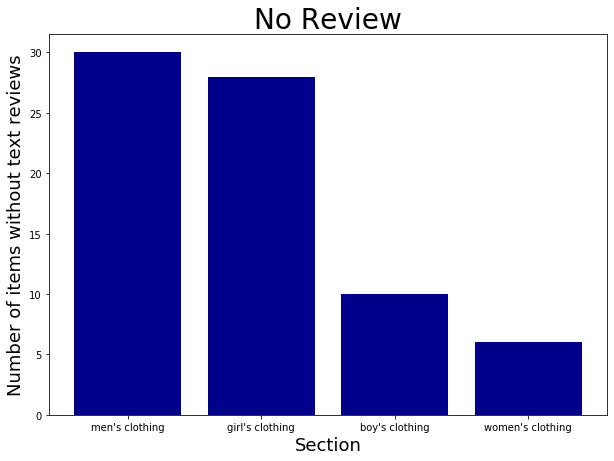

In [44]:
x = nan_rows.section.value_counts()
fig,ax = plt.subplots(figsize = (10,7),)
plt.bar(x=x.index, height=x.values, color = ["DarkBlue"])
plt.title("No Review", fontsize = 28)
plt.xlabel("Section", fontsize = 18)
plt.ylabel("Number of items without text reviews", fontsize = 18);

- Women's clothing group has the most items/observations and also the least amount of empty text. 

In [45]:
# Dropping the null values in review_text - anything I fill null values will cause bias and/or add unnecessary data. 
cleaning_df.dropna(subset=["review_text"], inplace = True)



In [46]:
cleaning_df["num_rating"]=cleaning_df["num_rating"].astype("float64")

cleaning_df["recommend"]=cleaning_df["recommend"].astype("float64")

In [47]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1224
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_name       1149 non-null   object 
 1   price           1149 non-null   float64
 2   overall_rating  1149 non-null   float64
 3   num_rating      1149 non-null   float64
 4   recommend       1149 non-null   float64
 5   rev_title       1149 non-null   object 
 6   review_text     1149 non-null   object 
 7   section         1149 non-null   object 
dtypes: float64(4), object(4)
memory usage: 80.8+ KB


In [48]:
cleaning_df.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing


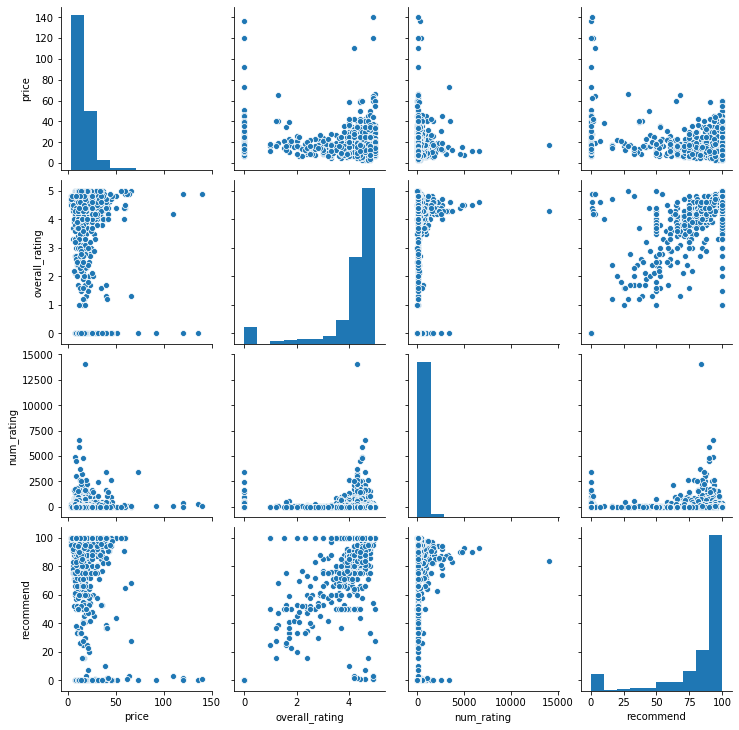

In [49]:
sns.pairplot(cleaning_df);

In [50]:
#0 - not recommended
#1 - recommended
target = []
for x in cleaning_df["recommend"]:
    if x >= 85:
        target.append(1)
    else:
        target.append(0)
        

In [51]:
cleaning_df["target"] = target

In [52]:
cleaning_df["num_rating"].value_counts(ascending=False)

3.0      43
4.0      41
2.0      41
1.0      38
7.0      34
         ..
518.0     1
133.0     1
142.0     1
343.0     1
525.0     1
Name: num_rating, Length: 366, dtype: int64

In [53]:
cleaning_df.reset_index(drop = True, inplace=True)

In [54]:
cleaning_df.head(7)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,"['Love them', 'Love them - definitely a classi...",['These are very cozy! Body pair for me and my...,men's clothing,1


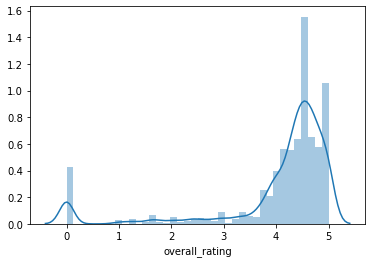

In [55]:
sns.distplot(cleaning_df["overall_rating"],kde=True, norm_hist=True); 

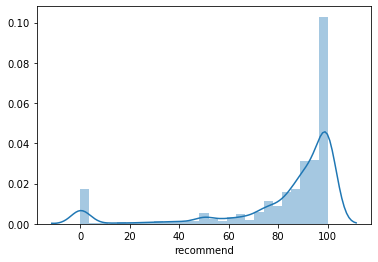

In [56]:
sns.distplot(cleaning_df["recommend"], norm_hist=True);

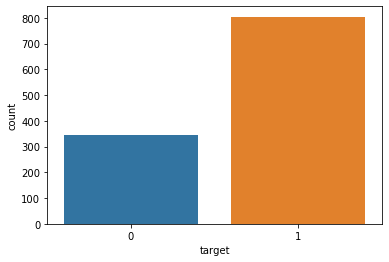

In [57]:
sns.countplot(x=cleaning_df["target"])

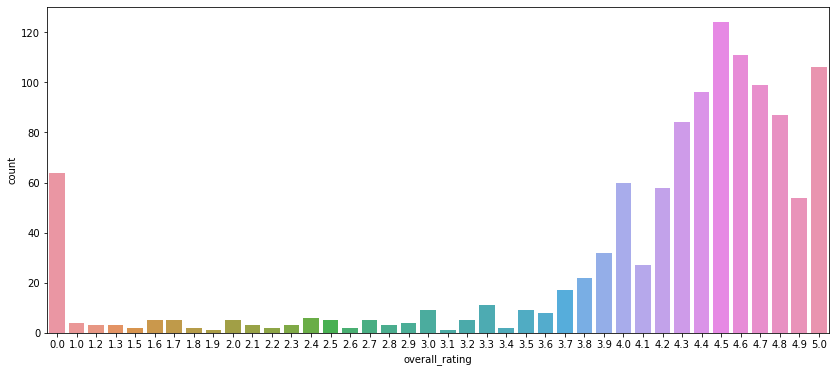

In [58]:
fig, ax = plt.subplots(figsize=(14,6))
sns.countplot(x=cleaning_df["overall_rating"])

In [59]:
rating_bin = []
for x in cleaning_df["overall_rating"]:
    if x < 4:
        rating_bin.append(0)
    elif x >4.5:
        rating_bin.append(2)
    else:
        rating_bin.append(1)

In [60]:
cleaning_df["rating_bin"] = rating_bin

In [61]:
cleaning_df.head(10)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1,2
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,"['Love them', 'Love them - definitely a classi...",['These are very cozy! Body pair for me and my...,men's clothing,1,0
7,Champion Men's Powerblend Graphic Crew,22.5,4.7,377.0,93.0,"['Great sweater and price!', 'A good purchase'...",['I bought 2 of these for $19 each were anothe...,men's clothing,1,2
8,Free Assembly Men's Two-Pocket Flannel Shirt,18.0,4.9,22.0,100.0,"['Washes well. Soft. Good value.', 'Super su...",['My husband also likes this shirt. I washed a...,men's clothing,1,2
9,Lee Men’s Big & Tall Regular Fit Jeans,24.9,4.4,913.0,88.0,"['Great jeans', 'From 501s to Lee Jeans. Best ...",['I have bought Lee jeans for several years. T...,men's clothing,1,1


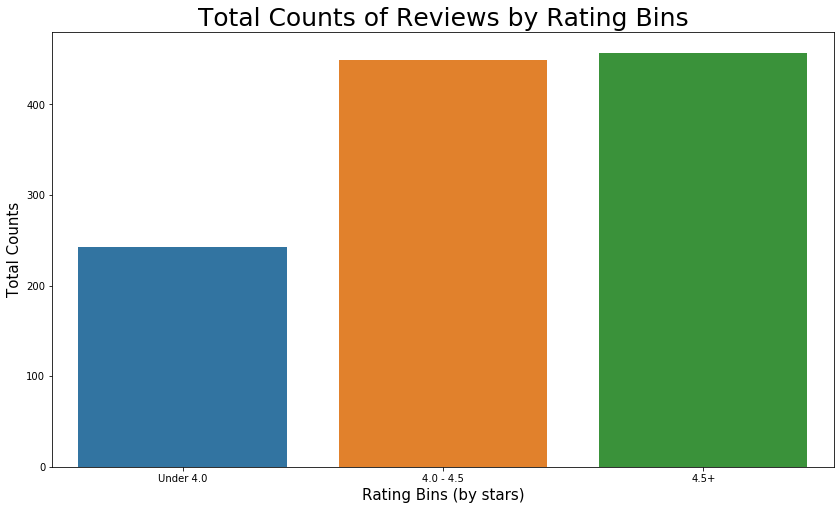

In [62]:
fig, ax = plt.subplots(figsize=(14,8))
fig = sns.countplot(x=cleaning_df["rating_bin"])
plt.title("Total Counts of Reviews by Rating Bins", fontsize=25)
plt.ylabel("Total Counts", fontsize=15)
plt.xlabel("Rating Bins (by stars)", fontsize=15)
fig.set_xticklabels(["Under 4.0", "4.0 - 4.5", "4.5+"], fontsize = 10);

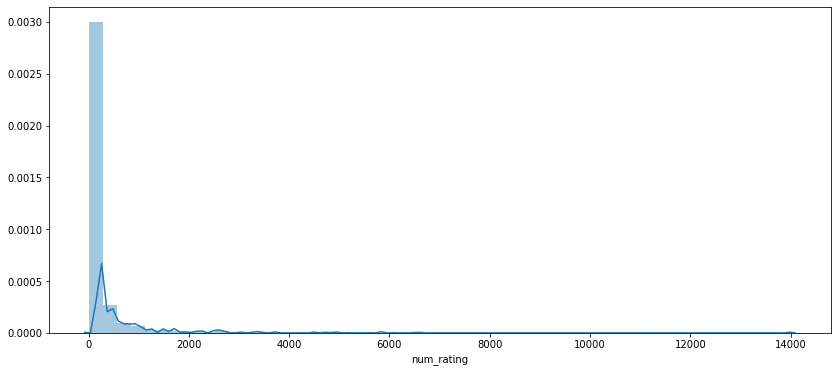

In [63]:
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(cleaning_df["num_rating"])

In [64]:
cleaning_df["num_rating"].max()

14012.0

In [65]:
cleaning_df[cleaning_df.num_rating == 14012]

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
542,Playtex 18 Hour 4803 Silky Soft Smoothing Wire...,17.44,4.3,14012.0,84.0,"['HAPPY', 'Great Fit', 'I give it 5***** stars...",['I AM 57 AND I HAVE ALWAYS LOVE THIS BRAND AN...,women's clothing,0,1


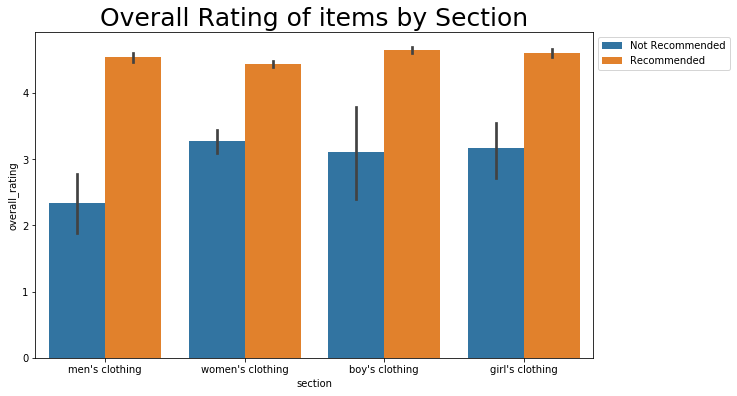

In [66]:
fig, ax= plt.subplots(figsize=(10,6))
sns.barplot(x="section", y="overall_rating", hue="target", data=cleaning_df)
plt.title("Overall Rating of items by Section", fontsize = 25)
L=plt.legend(bbox_to_anchor=(1, 1))
L.get_texts()[0].set_text('Not Recommended')
L.get_texts()[1].set_text('Recommended');

In [67]:
cleaning_df.to_csv("data/clean_df.csv")

In [68]:
cleaning_df.describe()

,price,overall_rating,num_rating,recommend,target,rating_bin
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,16.558033,4.068320,215.824195,82.685814,0.699739,1.186249
std,11.732099,1.199509,678.320284,26.586811,0.458571,0.758312
min,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,10.760000,4.000000,9.000000,80.000000,0.000000,1.000000
50%,13.940000,4.500000,36.000000,92.000000,1.000000,1.000000
75%,17.990000,4.700000,140.000000,100.000000,1.000000,2.000000
max,139.990000,5.000000,14012.000000,100.000000,1.000000,2.000000
